#### Import libraries  

In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [2]:
#Cell_2.
csv_in = 'decathlon2016rio.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [3]:
#Cell_3.
df = pd.read_csv(csv_in, sep=',', skiprows=8, header=0)
print(df.shape)
print(df.info())
display(df.head())

(20, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           20 non-null     int64 
 1   Name           20 non-null     object
 2   Nationality    20 non-null     object
 3   Result         20 non-null     int64 
 4   100m           20 non-null     int64 
 5   Long_jump      20 non-null     int64 
 6   Shot_put       20 non-null     int64 
 7   High_jump      20 non-null     int64 
 8   400m           20 non-null     int64 
 9   110mH          20 non-null     int64 
 10  Discus_throw   20 non-null     int64 
 11  Pole_vault     20 non-null     int64 
 12  Javelin_throw  20 non-null     int64 
 13  1500m          20 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 2.3+ KB
None


,Rank,Name,Nationality,Result,100m,Long_jump,Shot_put,High_jump,400m,110mH,Discus_throw,Pole_vault,Javelin_throw,1500m
0,1,Ashton Eaton,United States,8893,985,1045,773,813,1005,1000,777,972,734,789
1,2,Kévin Mayer,France,8834,903,960,836,840,896,972,804,1035,814,774
2,3,Damian Warner,Canada,8666,1023,977,708,840,941,1029,765,819,786,778
3,4,Kai Kazmirek,Germany,8580,910,982,741,896,971,896,731,910,807,736
4,5,Larbi Bourrada,Algeria,8521,917,940,715,896,910,955,713,790,836,849


#### Set data   

In [4]:
#Cell_4.
dfX = df.loc[:, '100m':]
n=dfX.shape[0] #sample size.
p=dfX.shape[1] #number of features.

print(n)
print(dfX.shape)
display(dfX.head())

20
(20, 10)


,100m,Long_jump,Shot_put,High_jump,400m,110mH,Discus_throw,Pole_vault,Javelin_throw,1500m
0,985,1045,773,813,1005,1000,777,972,734,789
1,903,960,836,840,896,972,804,1035,814,774
2,1023,977,708,840,941,1029,765,819,786,778
3,910,982,741,896,971,896,731,910,807,736
4,917,940,715,896,910,955,713,790,836,849


#### Standardization  

In [5]:
#Cell_5.
sc = StandardScaler()
X_std = sc.fit_transform(dfX)*(np.sqrt(n-1))/(np.sqrt(n))
print(X_std)

[[ 1.69596303  1.96164497  0.46009357 -0.39421812  2.30508491  1.42683219
   0.24820772  1.02461661 -0.58729124  1.10604714]
 [ 0.32650002  0.78700726  1.48252371 -0.01339918  0.37012723  0.97463863
   0.59634323  1.70950624  0.42966329  0.87188049]
 [ 2.33059223  1.0219348  -0.59479468 -0.01339918  1.16896297  1.89517552
   0.09348083 -0.63868675  0.0737292   0.93432493]
 [ 0.4434054   1.09103114 -0.05923603  0.77644749  1.70152013 -0.2527439
  -0.34491203  0.35059826  0.34067977  0.27865831]
 [ 0.56031078  0.51062192 -0.48119133  0.77644749  0.6186539   0.70009253
  -0.57700237 -0.9539534   0.70932579  2.04271374]
 [-1.15986836 -0.77456992  0.00568017  0.38152415  0.47663866  0.02180219
   0.67370668  0.02446034  1.84068771  0.59088051]
 [ 0.71061769  0.40006778 -0.82200138  0.77644749 -0.94351377 -0.54343976
   1.29261425  1.02461661 -0.35847647 -0.87656382]
 [-1.26007297  0.99429627 -1.42247623  1.58039856 -0.76599472 -1.02793287
  -0.25465468  1.70950624 -0.14237363 -0.01795278]
 

#### PCA  

In [6]:
#Cell_6.
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [7]:
#Cell_7.
#主成分得点
print(X_pca.shape)
print(X_pca)

(20, 7)
[[ 3.56942645 -0.98347552 -1.14240555 -1.30165626  0.27153522 -0.18460007
   0.14935513]
 [ 1.21353254 -0.47869661 -2.02658496 -0.8341293  -1.11720096 -0.18539971
  -0.46761305]
 [ 2.88761185 -1.51945157  0.2070709   0.12991062  1.30415827 -0.32808217
  -0.47019876]
 [ 1.62013669  0.13787698 -0.65607546  0.4503648   0.1445113  -0.05999976
   0.15644522]
 [ 1.92407792 -0.47295117  0.06356044  1.89074906  0.01318348  0.07953129
   0.48866613]
 [-0.70677651 -0.40355427 -1.05364595  1.61240054 -0.65973459 -0.8766104
  -0.08930945]
 [-0.48361409  1.3043003  -0.89393021 -0.67958012  1.57051353 -0.10931859
  -0.85936901]
 [-0.05882895  3.21229159 -0.75835267  0.42962514 -0.04477964 -0.66555223
   0.01220491]
 [-0.63616543 -0.77017099 -0.49986238  1.59227038  0.07409109  0.39292165
   0.38312242]
 [ 0.69825402 -1.17038658  0.08834728 -1.69547767 -0.31811466  0.41132457
   0.59528009]
 [ 1.43614383  1.97410614  0.45810612  0.12777221 -1.19135795  2.21432898
  -0.16696289]
 [-0.79043004 

In [8]:
#Cell_8.
#固有値
print('eigenvalues:',pca.explained_variance_)
#固有ベクトルの成分
print('eigenvectors:',pca.components_)

eigenvalues: [3.63995509 1.98863507 1.26055923 0.94332792 0.82708545 0.54235093
 0.33387844]
eigenvectors: [[ 0.36190421  0.42957977 -0.09753557  0.18199152  0.44604966  0.39447349
  -0.24635935  0.12289796 -0.18005794  0.42316088]
 [-0.34103094  0.15852364 -0.4245053   0.45646599 -0.2422605  -0.28799849
  -0.12786359  0.42991168 -0.35652096  0.00941149]
 [ 0.04342685 -0.33971909 -0.35037866 -0.15203715 -0.03455581  0.15722963
  -0.61427426 -0.40891777 -0.35182583 -0.20635229]
 [-0.16150633 -0.1075701  -0.19996527  0.5186184   0.02410323 -0.08341458
  -0.1160843  -0.4576537   0.55833695  0.33345411]
 [ 0.5007766   0.16517373 -0.53783874  0.03596115 -0.00250915 -0.20283896
   0.50523578 -0.29153098 -0.09170105 -0.20387298]
 [ 0.14044168 -0.04999303  0.54914761  0.36705738 -0.05827133 -0.29049819
   0.06704735 -0.37297816 -0.53603545  0.1508503 ]
 [-0.16976424  0.26194133 -0.11229865 -0.55864648  0.0767738  -0.54831336
  -0.1255145  -0.1602866  -0.04759615  0.47709238]]


In [9]:
#Cell_9.
#因子負荷量
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) 
print(loadings)

[[ 0.69046497 -0.48091833  0.04875734 -0.15686314  0.45542747  0.10342755
  -0.09809354]
 [ 0.81958092  0.22354841 -0.38141834 -0.10447753  0.15021599 -0.03681711
   0.1513555 ]
 [-0.18608485 -0.59863301 -0.39338634 -0.1942164  -0.48913334  0.4044169
  -0.06488865]
 [ 0.34721556  0.64370365 -0.17069915  0.50370848  0.03270459  0.2703175
  -0.32279831]
 [ 0.85100326 -0.34163327 -0.03879741  0.02341028 -0.00228193 -0.04291361
   0.0443616 ]
 [ 0.75260281 -0.40613252  0.17652898 -0.08101647 -0.18447034 -0.21393588
  -0.31682761]
 [-0.47002079 -0.18031192 -0.68967414 -0.11274696  0.45948283  0.04937667
  -0.07252506]
 [ 0.23447291  0.60625704 -0.45911091 -0.44449647 -0.26513063 -0.27467782
  -0.09261715]
 [-0.34352653 -0.50276219 -0.39501114  0.54228515 -0.08339682 -0.39476051
  -0.02750211]
 [ 0.80733452  0.01327199 -0.23168127  0.32386754 -0.18541073  0.11109292
   0.27567454]]


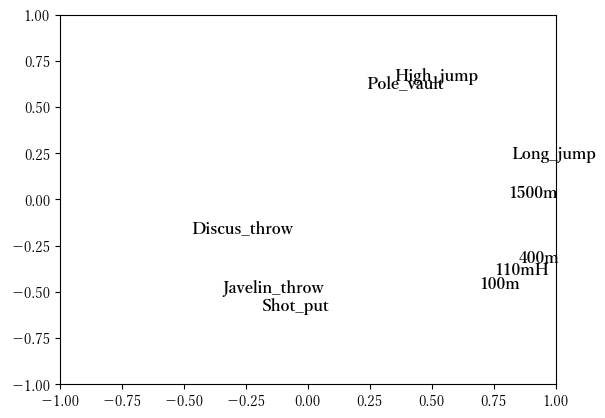

In [10]:
#Cell_10.因子負荷量の可視化
font = {'family' : 'Yu Mincho'}
plt.rc('font', **font)

plt.xlim(-1,1)
plt.ylim(-1,1)
for i in range(p):
    plt.text(loadings[i,0],loadings[i,1], str(dfX.columns[i]),fontdict={'weight':'bold','size':12})

plt.show()

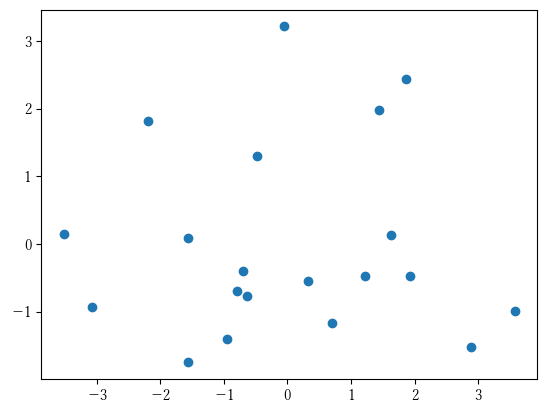

In [11]:
#Cell_11.主成分得点の可視化
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

In [12]:
#Cell_12.
print("各主成分ごとの寄与率：",pca.explained_variance_ratio_)
print("各主成分までの累積寄与率：",np.cumsum(pca.explained_variance_ratio_))

各主成分ごとの寄与率： [0.36399551 0.19886351 0.12605592 0.09433279 0.08270855 0.05423509
 0.03338784]
各主成分までの累積寄与率： [0.36399551 0.56285902 0.68891494 0.78324773 0.86595628 0.92019137
 0.95357921]


**Ans.1: up to PC3 (0.689)**

#### Draw graph of contribution  

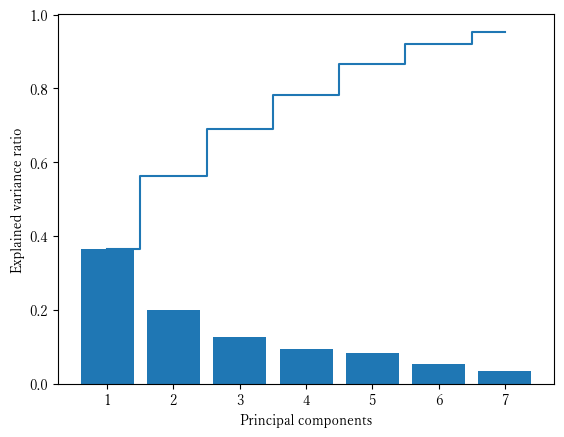

In [13]:
#Cell_13.
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

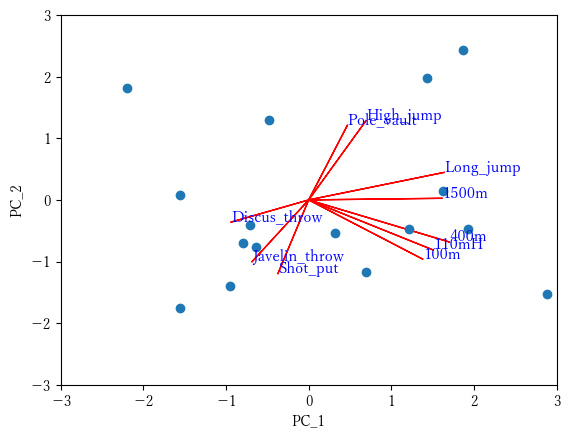

In [14]:
#Cell_14.
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 2
    r2 = 1
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
        plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], loadings.T, coef_labels=dfX.columns)